<a href="https://colab.research.google.com/github/suresh577/REACT_PR/blob/master/EPICFINAL3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas openpyxl

In [ ]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

# Load the Excel file
file_path = '/content/drive/MyDrive/final.xlsx'
df = pd.read_excel(file_path)


# Convert relevant columns to numeric
df['pH'] = pd.to_numeric(df['pH'], errors='coerce')
df['DO (mg/L)'] = pd.to_numeric(df['DO (mg/L)'], errors='coerce')
df['Water Temp (0C)'] = pd.to_numeric(df['Water Temp (0C)'], errors='coerce')

# Classification function with weighted scoring
def classify_water_quality(pH, DO, temperature):
    ph_thresholds = {'very_low': 5.5, 'low': 6.5, 'medium': 7.5, 'high': 8.5, 'very_high': 8.5}
    do_thresholds = {'very_low': 2, 'low': 3, 'medium': 5, 'high': 8, 'very_high': 8}
    temp_thresholds = {'very_low': 10, 'low': 15, 'medium': 25, 'high': 30, 'very_high': 30}

    do_weight, ph_weight, temp_weight = 0.6, 0.3, 0.15

    weighted_score = 0
    # DO Score
    if DO < do_thresholds['very_low']:
        weighted_score += do_weight * 1
    elif DO < do_thresholds['low']:
        weighted_score += do_weight * 2
    elif DO < do_thresholds['medium']:
        weighted_score += do_weight * 3
    elif DO < do_thresholds['high']:
        weighted_score += do_weight * 4
    else:
        weighted_score += do_weight * 5

    # pH Score
    if pH < ph_thresholds['very_low']:
        weighted_score += ph_weight * 1
    elif pH < ph_thresholds['low']:
        weighted_score += ph_weight * 2
    elif pH < ph_thresholds['medium']:
        weighted_score += ph_weight * 3
    elif pH < ph_thresholds['high']:
        weighted_score += ph_weight * 4
    else:
        weighted_score += ph_weight * 5

    # Temperature Score
    if temperature < temp_thresholds['very_low']:
        weighted_score += temp_weight * 1
    elif temperature < temp_thresholds['low']:
        weighted_score += temp_weight * 2
    elif temperature < temp_thresholds['medium']:
        weighted_score += temp_weight * 3
    elif temperature < temp_thresholds['high']:
        weighted_score += temp_weight * 4
    else:
        weighted_score += temp_weight * 5

    # Classification based on weighted score
    if weighted_score <= 2.0:
        return 'Very Low'
    elif weighted_score <= 3.0:
        return 'Low'
    elif weighted_score <= 4.0:
        return 'Medium'
    elif weighted_score <= 5.0:
        return 'High'
    else:
        return 'Very High'
# Apply classification
df['Water_Quality_Class'] = df.apply(
    lambda row: classify_water_quality(row['pH'], row['DO (mg/L)'], row['Water Temp (0C)']),
    axis=1
)

# Save to Excel with colors
output_file_path = 'fine_tuned_classified_data_colored.xlsx'
df.to_excel(output_file_path, index=False, engine='openpyxl')

# Define colors for each classification
color_map = {
    'Very Low': '#fc0320',  # red
    'Low': '#fc9803',       # orange
    'Medium': '#FFFF00',    # yellow
    'High': '#ADFF2F',      # yellow-green
    'Very High': '#00FF00'  # green
}

# Load the workbook and worksheet
output_file_path = 'fine_tuned_classified_data_colored.xlsx'
wb = load_workbook(output_file_path)
ws = wb.active

# Find the index of the Water_Quality_Class column
classification_column = ws.max_column  # Assumes 'Water_Quality_Class' is the last column

# Apply fill color to each row based on the classification
for row in ws.iter_rows(min_row=2, max_row=ws.max_row, min_col=1, max_col=ws.max_column):
    classification = row[classification_column - 1].value  # Retrieve classification from the last column
    fill_color = color_map.get(classification)

    if fill_color:
        # Apply color to the entire row
        for cell in row:
            cell.fill = PatternFill(start_color=fill_color[1:], end_color=fill_color[1:], fill_type="solid")

# Save the workbook with colored formatting
wb.save(output_file_path)

print(f"Classified data with row colors has been saved to {output_file_path}")

Classified data with row colors has been saved to fine_tuned_classified_data_colored.xlsx


In [ ]:
from google.colab import files
files.download('fine_tuned_classified_data_colored.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-7-4e21385283ba>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
<ipython-input-7-4e21385283ba>:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


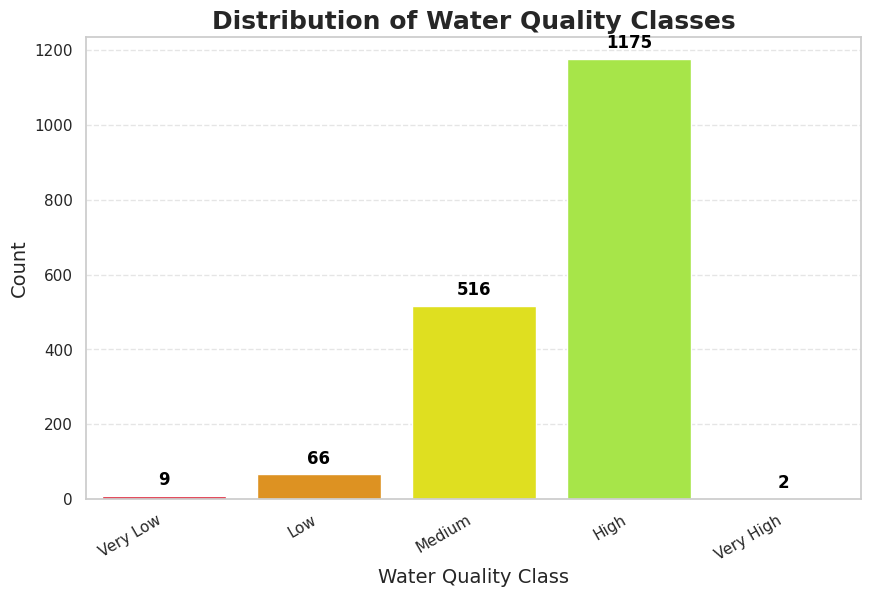

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# Custom color palette for water quality classes
custom_colors = {
    'Very Low': '#fc0320',  # Red
    'Low': '#fc9803',       # Orange
    'Medium': '#FFFF00',    # Yellow
    'High': '#ADFF2F',      # Yellow-Green
    'Very High': '#00FF00'  # Green
}

# Convert color mapping into a list format for seaborn
color_palette = [custom_colors[cls] for cls in ['Very Low', 'Low', 'Medium', 'High', 'Very High']]

# Create a figure with a customized size
plt.figure(figsize=(10, 6))

# Generate a countplot with the specified color palette
ax = sns.countplot(
    x='Water_Quality_Class',
    data=df,
    palette=color_palette,
    order=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

# Add title and labels with consistent font size and weight
plt.title('Distribution of Water Quality Classes', fontsize=18, fontweight='bold')
plt.xlabel('Water Quality Class', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Add count labels above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points', fontsize=12, fontweight='bold', color='black')

# Set grid style
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.show()
